In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visa_df = pd.read_csv(r"C:\Users\vinay\Documents\Naresh IT\Data_Files\Visadataset.csv")
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [3]:
keys = visa_df.value_counts().keys()
values = visa_df.value_counts().values
keys,values

(MultiIndex([(   'EZYV01',          'Asia', 'High School', 'N', 'N', ...),
             ('EZYV25287',        'Europe',   'Doctorate', 'Y', 'N', ...),
             ('EZYV25285',          'Asia',  'Bachelor's', 'N', 'N', ...),
             ('EZYV25284',          'Asia',    'Master's', 'N', 'N', ...),
             ('EZYV25283', 'South America', 'High School', 'Y', 'N', ...),
             ('EZYV25282',          'Asia',    'Master's', 'Y', 'Y', ...),
             ('EZYV25281', 'North America',  'Bachelor's', 'N', 'N', ...),
             ('EZYV25280',          'Asia',    'Master's', 'Y', 'N', ...),
             ( 'EZYV2528',          'Asia',  'Bachelor's', 'N', 'N', ...),
             ('EZYV25279',          'Asia',  'Bachelor's', 'N', 'N', ...),
             ...
             ('EZYV17638', 'North America',  'Bachelor's', 'N', 'N', ...),
             ('EZYV17637',          'Asia',  'Bachelor's', 'Y', 'N', ...),
             ('EZYV17636',        'Europe',    'Master's', 'Y', 'Y', ...),
        

In [4]:
cat = visa_df.select_dtypes(include='object').columns
num = visa_df.select_dtypes(exclude='object').columns
cat,num

(Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
        'requires_job_training', 'region_of_employment', 'unit_of_wage',
        'full_time_position', 'case_status'],
       dtype='object'),
 Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object'))

In [5]:
wage_data = pd.DataFrame(visa_df['prevailing_wage'])
wage_data

,prevailing_wage
0,592.2029
1,83425.6500
2,122996.8600
3,83434.0300
4,149907.3900
...,...
25475,77092.5700
25476,279174.7900
25477,146298.8500
25478,86154.7700


In [6]:
count = round(len(wage_data),2)
count

25480

In [7]:
minn = np.min(wage_data)
print(round(minn,2))
print(wage_data.min())

2.14
prevailing_wage    2.1367
dtype: float64


In [8]:
maxx = np.max(wage_data)
print(round(maxx,2))
print(wage_data.max())

319210.27
prevailing_wage    319210.27
dtype: float64


In [9]:
mean = round(np.mean(wage_data),2)
mean

74455.81

In [10]:
median = round(np.median(wage_data),2)
median

70308.21

In [11]:
# Both returns "percentile" but "quantile" take input from 0 to 1
p_25 = round(np.percentile(wage_data,25),2)
print(p_25)
print(round(np.quantile(wage_data,.25),2))

34015.48
34015.48


In [12]:
p_50 = round(np.percentile(wage_data,50),2)
print(p_50)
print(round(np.quantile(wage_data,.50),2))

70308.21
70308.21


In [13]:
p_75 = round(np.percentile(wage_data,75),2)
print(p_75)
print(round(np.quantile(wage_data,.75),2))

107735.51
107735.51


In [14]:
data = [count,minn,p_25,mean,median,p_50,p_75,maxx]
idx = ['count','minn','p_25','mean','median','p_50','p_75','maxx']
d = pd.DataFrame(data,index=idx,columns=['Values'])
d

,Values
count,25480.0000
minn,2.1367
p_25,34015.4800
mean,74455.8100
median,70308.2100
p_50,70308.2100
p_75,107735.5100
maxx,319210.2700


In [15]:
idx = ['count','minn','p_25','mean','median','p_50','p_75','maxx']
num = visa_df.select_dtypes(exclude='object').columns
empty_list = []
for i in num:
    data = visa_df[i]
    count = len(data)
    minn = np.min(data)
    maxx = np.max(data)
    mean = np.mean(data)
    median = np.median(data)
    p_25 = np.percentile(data,25)
    p_50 = np.percentile(data,55)
    p_75 = np.percentile(data,75)
    l = [count,minn,p_25,mean,median,p_50,p_75,maxx]
    empty_list.append(l)

el = pd.DataFrame(empty_list,columns=idx,index=num).T
el

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.00000,25480.000000,25480.000000
minn,-26.00000,1800.000000,2.136700
p_25,1022.00000,1976.000000,34015.480000
mean,5667.04321,1979.409929,74455.814592
median,2109.00000,1997.000000,70308.210000
p_50,2355.00000,1998.000000,77329.121000
p_75,3504.00000,2005.000000,107735.512500
maxx,602069.00000,2016.000000,319210.270000


In [16]:
visa_df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


# May be Next class

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
visa_df = pd.read_csv(r"C:\Users\vinay\Documents\Naresh IT\Data_Files\Visadataset.csv")

cat = visa_df.select_dtypes(include='object').columns
num = visa_df.select_dtypes(exclude='object').columns
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [20]:
wage_data = visa_df['prevailing_wage']
wage_data

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

In [21]:
len(wage_data)

25480

In [22]:
p_25 = np.percentile(wage_data,25)
print(p_25)
print(25*25480/100)

34015.479999999996
6370.0


In [23]:
p_50 = np.percentile(wage_data,50)
print(p_50)
# 50% = 
print(50*25480/100)

70308.20999999999
12740.0


In [24]:
p_75 = np.percentile(wage_data,75)
print(p_75)
print(75*25480/100)

107735.51250000001
19110.0


## Meaning of above codes is ##
- 25% of applicants have less wage than 34015
    - 25% of 25480 = 6370 have less wage than 34015
- 50% of applicants have less wage than 70308
    - 50% of 25480 = 12740 have less wage than 70308
- 75% of applicants have less wage than 34015
    - 75% of 25480 = 19110 have less wage than 107735


In [25]:
p_25 = np.percentile(wage_data,25)
con = wage_data<p_25
len(visa_df[con])

6370

In [26]:
p_50 = np.percentile(wage_data,50)
con = wage_data<p_50
len(visa_df[con])

12740

In [27]:
p_75 = np.percentile(wage_data,75)
con = wage_data<p_75
len(visa_df[con])

19110

## Emperical Rule ##
- mue - 1 * sigma   to   mue + 1 * sigma   = 68%
- mue - 2 * sigma   to   mue + 2 * sigma   = 95%
- mue - 3 * sigma   to   mue + 3 * sigma   = 99.7%

- step 1 : calculate "mean"
- step 2 : calculate "standard deviation"
- step 3 : calculate "Lower Bound"
- step 4 : calculate "Upper Bound"
- step 5 : calculate "condition_1 = data > lb"
- step 6 : calculate "condition_2 = data < ub"
- step 7 : calculate "data under condition_1 and condition_2"
- step 8 : calculate "lenght of data"

In [28]:
wage_mean = np.mean(wage_data)
wage_std = np.std(wage_data)
lb = wage_mean-1*wage_std
ub = wage_mean+1*wage_std
con1 = wage_data>lb
con2 = wage_data<ub
con = con1 & con2
print(len(visa_df[con])==68%25480/100)

False


In [29]:
wage_mean = np.mean(wage_data)
wage_std = np.std(wage_data)
lb = wage_mean-2*wage_std
ub = wage_mean+2*wage_std
con1 = wage_data>lb
con2 = wage_data<ub
con = con1 & con2
print(len(visa_df[con])==95%25480/100)

False


In [30]:
wage_mean = np.mean(wage_data)
wage_std = np.std(wage_data)
lb = wage_mean-3*wage_std
ub = wage_mean+3*wage_std
con1 = wage_data>lb
con2 = wage_data<ub
con = con1 & con2
print(len(visa_df[con])==99.7%25480/100)

False


Conclusion : Data does not following **Normal Deviation**

### Histogram ###

(array([6038., 5504., 5681., 4551., 2334.,  624.,  373.,  240.,  114.,
          21.]),
 array([2.13670000e+00, 3.19229500e+04, 6.38437634e+04, 9.57645767e+04,
        1.27685390e+05, 1.59606203e+05, 1.91527017e+05, 2.23447830e+05,
        2.55368643e+05, 2.87289457e+05, 3.19210270e+05]),
 <BarContainer object of 10 artists>)

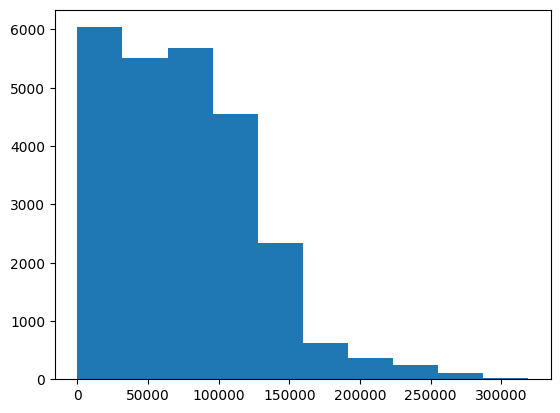

In [31]:
plt.hist(wage_data)

In [32]:
lb = wage_data>=2.13670000e+00
ub = wage_data<3.19229500e+04
con = lb & ub
len(visa_df[con])

6038

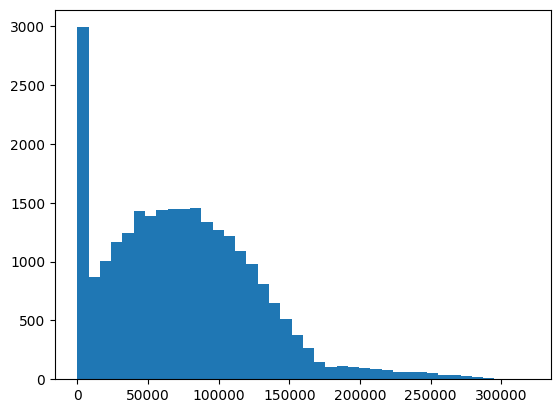

In [33]:
plt.hist(wage_data,bins=40) # "Bins" specify the number of "Bars we get in the Chart"
plt.show()

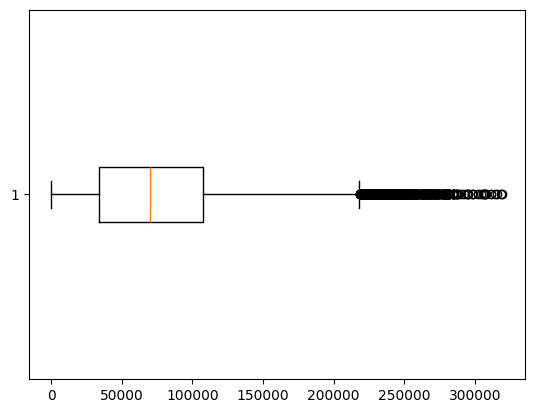

In [34]:
plt.boxplot(wage_data,vert=False)
plt.show()

### If the data is not following **Normal Deviation**
- Step 1 : q1 = 25 percentile, q2 = 25 percentile, q3 = 25 percentile
- Step 2 : IQR  (q3-q1)
- Step 3 : lb = q1-1.5*IQR
- Step 4 : ub = q3+1.5*IQR
- Step 5 : con1 = wage_data < lb
- Step 6 : con2 = wage_data > lb
- Step 7 : con = con1 or con2 (con1 | con2)

### Outliers Data ###

In [35]:
q1 = np.percentile(wage_data,25)
q2 = np.percentile(wage_data,50)
q3 = np.percentile(wage_data,75)
IQR = q3-q1
lb = q1-1.5*IQR
ub = q3+1.5*IQR
con1 = wage_data<lb
con2 = wage_data>ub
con = con1 | con2
outlier_df = wage_data[con]
print(lb,ub)
print(len(outlier_df))
outlier_df

-76564.56875000002 218315.56125000003
427


14       220081.73
34       225569.73
130      247393.01
216      269321.68
221      219529.62
           ...    
25191    280482.51
25195    234308.77
25468    272715.74
25469    273772.47
25476    279174.79
Name: prevailing_wage, Length: 427, dtype: float64

### Non-Outliers Data ###

In [36]:
q1 = np.percentile(wage_data,25)
q2 = np.percentile(wage_data,50)
q3 = np.percentile(wage_data,75)
IQR = q3-q1
lb = q1-1.5*IQR
ub = q3+1.5*IQR
con1 = wage_data>lb
con2 = wage_data<ub
con = con1 & con2
non_outlier_df = wage_data[con]
print(lb,ub)
print(len(non_outlier_df))
non_outlier_df

-76564.56875000002 218315.56125000003
25053


0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25474     51104.7800
25475     77092.5700
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25053, dtype: float64

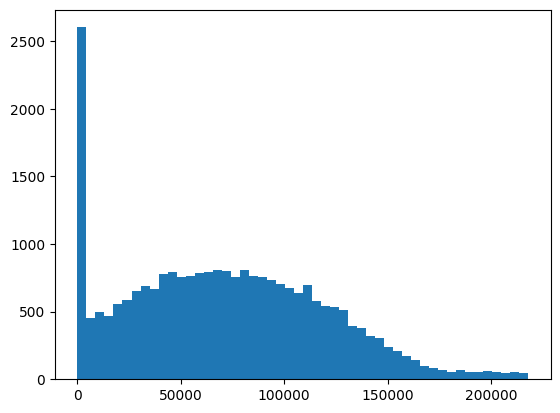

In [37]:
plt.hist(non_outlier_df,bins=50)
plt.show()

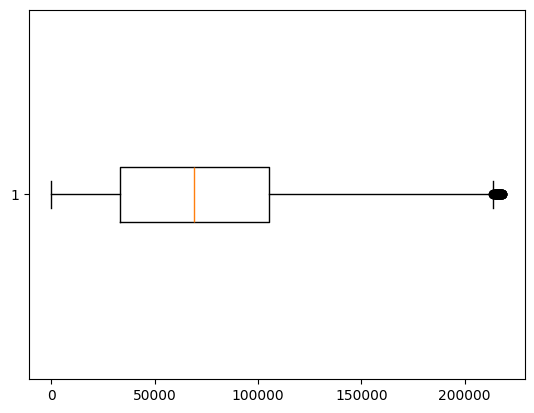

In [38]:
plt.boxplot(non_outlier_df,vert=False)
plt.show()

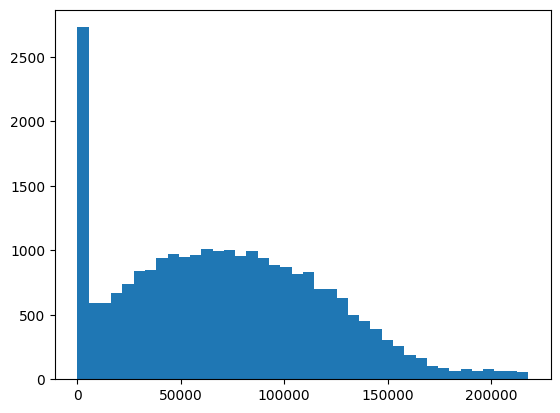

In [39]:
plt.hist(wage_data[con],bins=40)
plt.show()

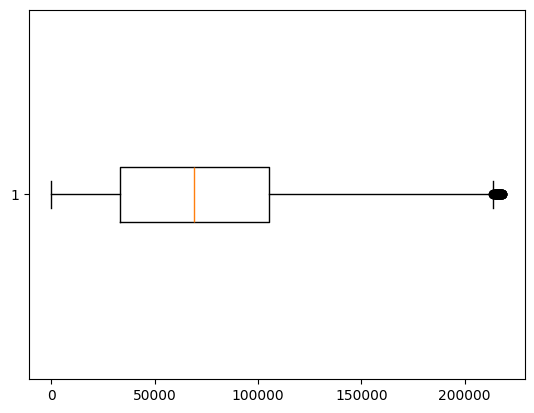

In [40]:
plt.boxplot(wage_data[con],vert=False)
plt.show()

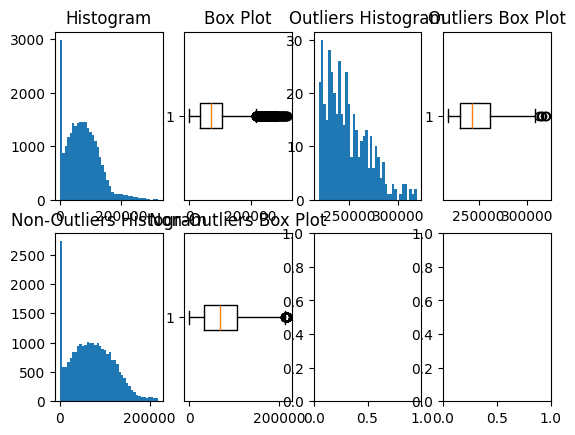

In [41]:
plt.subplot(2,4,1)
plt.hist(wage_data,bins=40)
plt.title('Histogram')

plt.subplot(2,4,2)
plt.boxplot(wage_data,vert=False)
plt.title('Box Plot')

plt.subplot(2,4,3)
q1 = np.percentile(wage_data,25)
q2 = np.percentile(wage_data,50)
q3 = np.percentile(wage_data,75)
IQR = q3-q1
lb = q1-1.5*IQR
ub = q3+1.5*IQR
con1 = wage_data<lb
con2 = wage_data>ub
con = con1 | con2
plt.hist(wage_data[con],bins=40)
plt.title('Outliers Histogram')

plt.subplot(2,4,4)
plt.boxplot(wage_data[con],vert=False)
plt.title('Outliers Box Plot')

plt.subplot(2,4,5)
q1 = np.percentile(wage_data,25)
q2 = np.percentile(wage_data,50)
q3 = np.percentile(wage_data,75)
IQR = q3-q1
lb = q1-1.5*IQR
ub = q3+1.5*IQR
con1 = wage_data>lb
con2 = wage_data<ub
con = con1 & con2
plt.hist(wage_data[con],bins=40)
plt.title('Non-Outliers Histogram')

plt.subplot(2,4,6)
plt.boxplot(wage_data[con],vert=False)
plt.title('Non-Outliers Box Plot')

plt.subplot(2,4,7)


plt.subplot(2,4,8)
plt.show()

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

visa_df = pd.read_csv(r'/Users/tejeshsingh/Desktop/DS & AI/Data Files/Visadataset.csv')

cat = visa_df.select_dtypes(include='object').columns
num = visa_df.select_dtypes(exclude='object').columns
cat,num

FileNotFoundError: [Errno 2] No such file or directory: '/Users/tejeshsingh/Desktop/DS & AI/Data Files/Visadataset.csv'

In [ ]:
wage_df = visa_df['prevailing_wage']
wage_data

### Data With Outlier both histogram and boxplot ###

In [ ]:
plt.title('Data With Outliers Histogram')
plt.hist(wage_data,bins=40)
plt.show()

In [ ]:
plt.title('Data With Outliers Box Plot')
plt.boxplot(wage_data,vert=False)
plt.show()

### Task 1 : Only outlier both histogram and boxplot ###

In [43]:
q1 = np.percentile(wage_data,25)
q2 = np.percentile(wage_data,50)
q3 = np.percentile(wage_data,75)
IQR = q3-q1
lb = q1-1.5*IQR
ub = q3+1.5*IQR
con1 = wage_data < lb
con2 = wage_data > ub
con = con1 | con2
outlier = wage_data[con]
len(outlier)

427

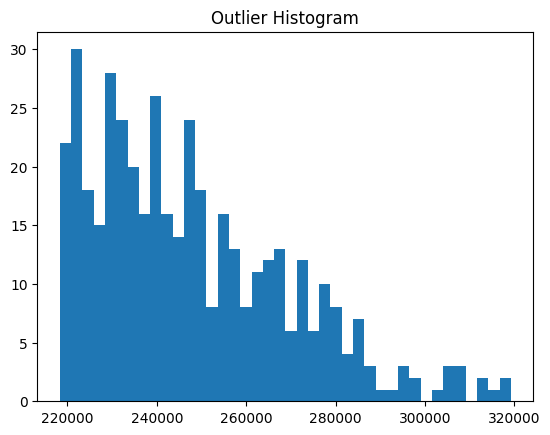

In [44]:
plt.title('Outlier Histogram')
plt.hist(outlier,bins=40)
plt.show()

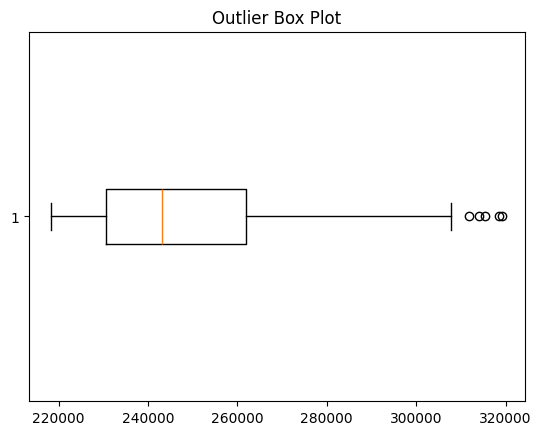

In [45]:
plt.title('Outlier Box Plot')
plt.boxplot(outlier,vert=False)
plt.show()

### Task 2 : Data Without outlier both histogram and boxplot ###

In [46]:
q1 = np.percentile(wage_data,25)
q2 = np.percentile(wage_data,50)
q3 = np.percentile(wage_data,75)
IQR = q3-q1
lb = q1-1.5*IQR
ub = q3+1.5*IQR
con1 = wage_data > lb
con2 = wage_data < ub
con = con1 & con2
non_outlier = wage_data[con]
len(non_outlier)

25053

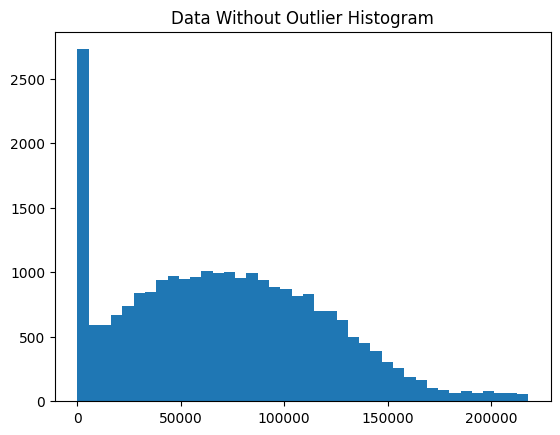

In [47]:
plt.title('Data Without Outlier Histogram')
plt.hist(non_outlier,bins=40)
plt.show()

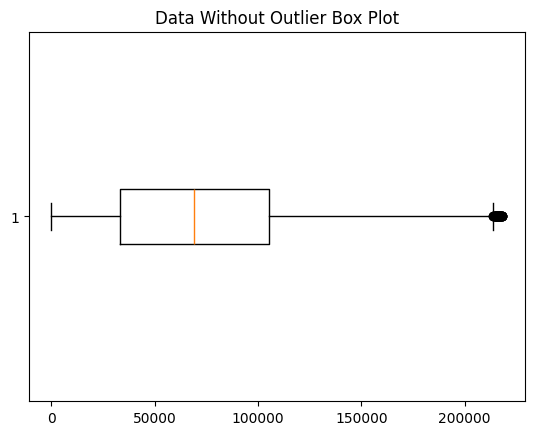

In [48]:
plt.title('Data Without Outlier Box Plot')
plt.boxplot(non_outlier,vert=False)
plt.show()

### Task 3 : Relace Outliers values wage_median ###

In [49]:
outliers_data=outlier.values 
l=[]
wage_data=visa_df['prevailing_wage' ].values 
wage_median=visa_df['prevailing_wage'].median()
for i in wage_data:
    if i in outliers_data:
        l.append(wage_median)
    else:
        l.append(i)

len(l)

25480

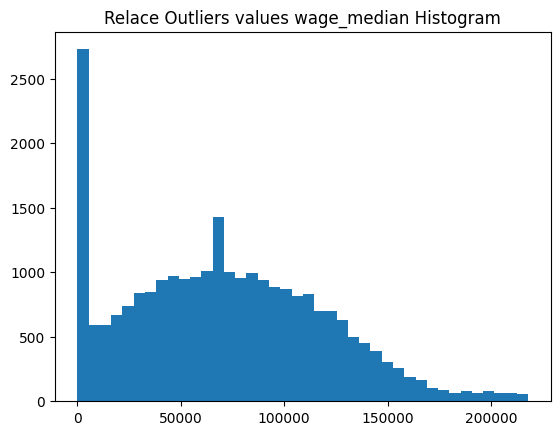

In [50]:
plt.title('Relace Outliers values wage_median Histogram')
plt.hist(l,bins=40)
plt.show()

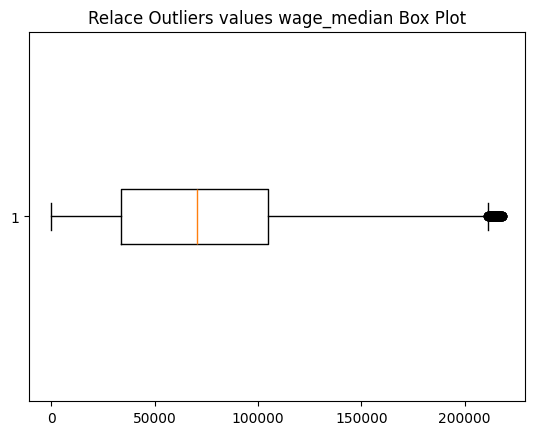

In [51]:
plt.title('Relace Outliers values wage_median Box Plot')
plt.boxplot(l,vert=False)
plt.show()

### Task 4 : 4*4 Graph ###

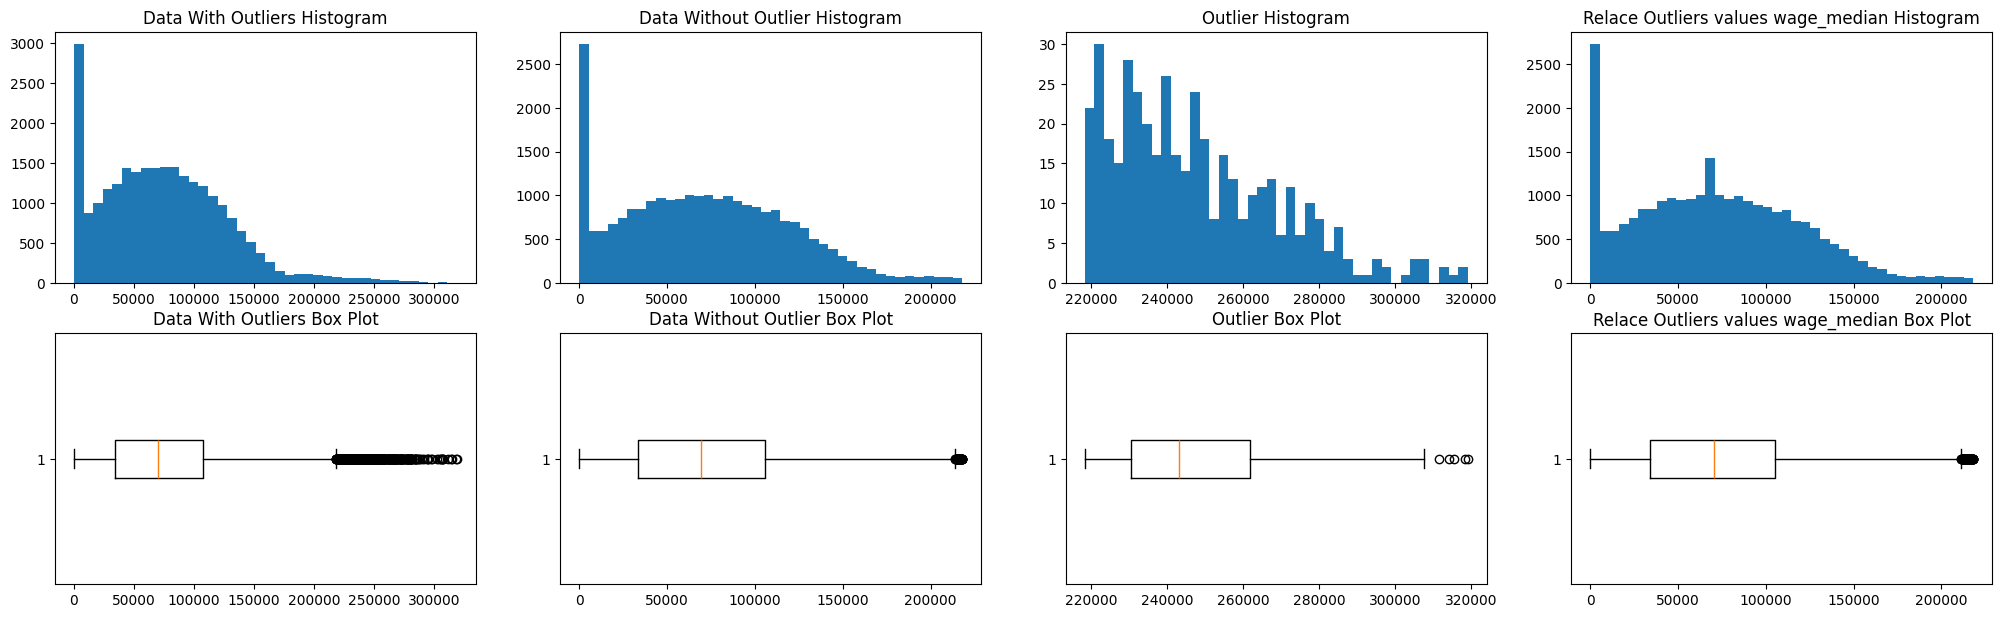

In [52]:
plt.figure(figsize=(25,15))

plt.subplot(4,4,1)
plt.title('Data With Outliers Histogram')
plt.hist(wage_data,bins=40)

plt.subplot(4,4,2)
plt.title('Data Without Outlier Histogram')
plt.hist(non_outlier,bins=40)

plt.subplot(4,4,3)
plt.title('Outlier Histogram')
plt.hist(outlier,bins=40)

plt.subplot(4,4,4)
plt.title('Relace Outliers values wage_median Histogram')
plt.hist(l,bins=40)

plt.subplot(4,4,5)
plt.title('Data With Outliers Box Plot')
plt.boxplot(wage_data,vert=False)

plt.subplot(4,4,6)
plt.title('Data Without Outlier Box Plot')
plt.boxplot(non_outlier,vert=False)

plt.subplot(4,4,7)
plt.title('Outlier Box Plot')
plt.boxplot(outlier,vert=False)

plt.subplot(4,4,8)
plt.title('Relace Outliers values wage_median Box Plot')
plt.boxplot(l,vert=False)

plt.show()